In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [4]:
#99709 is the ZIP code for Fairbanks, Alaska
alaska = pd.read_csv("99709.csv", parse_dates=['date_time'], index_col=['date_time'])


# This will tell us about the df
print("There are",len(alaska),"observations in df.")
print("The columns are",list(alaska.columns))

# Look at 5 randomly sampled rows
alaska.sample(5)

There are 36536 observations in df.
The columns are ['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'location']


,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
date_time,,,,,,,,,,,,,,,,,,,,,
2014-07-16 06:00:00,19,10,0.0,16.6,4,68,11:56 PM,11:52 AM,03:56 AM,11:56 PM,...,14,25,84,0.0,1019,12,10,229,8,99709
2014-10-20 03:00:00,0,-6,0.0,8.7,2,14,04:55 AM,05:31 PM,09:01 AM,06:10 PM,...,21,24,93,0.0,990,-6,10,38,10,99709
2016-09-21 06:00:00,15,7,0.0,11.6,4,58,09:56 PM,03:03 PM,07:34 AM,07:54 PM,...,19,47,77,0.1,996,7,10,104,9,99709
2013-05-12 09:00:00,5,2,0.0,14.0,1,11,06:24 AM,01:02 AM,04:37 AM,11:01 PM,...,3,80,96,0.0,1004,3,2,263,2,99709
2018-07-27 18:00:00,24,15,0.0,17.4,6,99,11:17 PM,04:24 AM,04:34 AM,11:19 PM,...,12,23,49,0.3,1016,23,9,270,10,99709


In [5]:
## first make a copy of the original dataframe
# this is due to the way python internally 
# stores objects
alaska_copy = alaska.copy()

## Now use sample to make a random sample
## frac allows us to choose a fraction of the df
## it is common to set aside 25% for testing
alaska_train = alaska_copy.sample(frac = .75, random_state = 440)

## now use drop and the train index to make test
alaska_test = alaska_copy.drop(alaska_train.index)

In [6]:
alaska_train.head(10)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
date_time,,,,,,,,,,,,,,,,,,,,,
2018-12-07 21:00:00,-2,-4,0.3,1.0,1,0,11:38 AM,04:46 PM,11:38 AM,03:49 PM,...,11,97,86,0.0,989,-3,10,17,5,99709
2011-09-15 06:00:00,12,7,0.0,10.3,2,74,07:44 PM,12:20 PM,07:13 AM,08:18 PM,...,12,64,93,1.2,1001,8,9,230,6,99709
2012-09-17 00:00:00,10,1,0.0,9.0,3,6,10:33 AM,07:37 PM,07:22 AM,08:08 PM,...,11,10,85,0.0,996,4,10,133,5,99709
2012-01-11 06:00:00,-9,-19,1.0,1.2,1,79,09:13 PM,11:23 AM,11:38 AM,04:21 PM,...,20,29,86,0.0,999,-9,10,107,10,99709
2015-08-27 18:00:00,9,4,0.0,10.5,2,85,08:24 PM,03:18 AM,06:16 AM,09:28 PM,...,33,75,88,1.0,1009,5,9,274,21,99709
2016-05-17 09:00:00,9,4,0.0,15.3,2,72,05:46 PM,04:26 AM,04:19 AM,11:20 PM,...,21,49,50,0.0,1009,7,10,71,18,99709
2014-06-25 12:00:00,15,11,0.0,-2.5,4,0,03:22 AM,10:09 PM,03:00 AM,12:48 AM,...,10,80,81,0.6,1004,13,2,282,7,99709
2016-05-15 06:00:00,16,10,0.0,14.7,3,58,03:11 PM,04:08 AM,04:26 AM,11:13 PM,...,11,49,83,1.6,1011,13,10,350,7,99709
2017-11-26 21:00:00,-18,-25,0.0,5.1,2,52,03:40 PM,No moonset,11:06 AM,04:11 PM,...,26,32,84,0.0,989,-18,10,52,13,99709


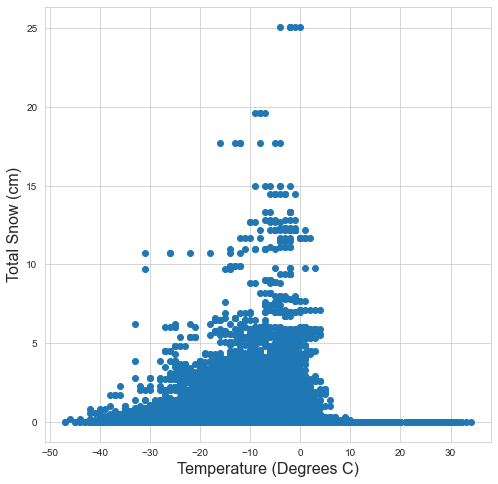

In [8]:
## first make a figure
## this makes a figure that is 8 units by 8 units
plt.figure(figsize = (8,8))

## plt.scatter plots RD on the x and W on the y
plt.scatter(alaska_train.tempC, alaska_train.totalSnow_cm)

## Always good practice to label well when
## presenting a figure to others
## place an xlabel
plt.xlabel("Temperature (Degrees C)", fontsize =16)

## place a ylabel
plt.ylabel("Total Snow (cm)", fontsize = 16)

## type this to show the plot
plt.show()

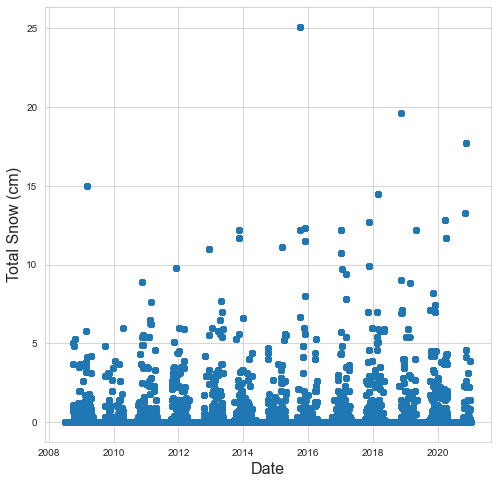

In [10]:
## first make a figure
## this makes a figure that is 8 units by 8 units
plt.figure(figsize = (8,8))

## plt.scatter plots RD on the x and W on the y
plt.scatter(alaska_train.index.values, alaska_train.totalSnow_cm)

## Always good practice to label well when
## presenting a figure to others
## place an xlabel
plt.xlabel("Date", fontsize =16)

## place a ylabel
plt.ylabel("Total Snow (cm)", fontsize = 16)

## type this to show the plot
plt.show()